<a href="https://colab.research.google.com/github/VaibhavShintre/Introduction-to-Data-Science/blob/main/LavanIndividual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries and import
from google.colab import files
import io
import pandas as pd
import numpy as np

# Mount Google Drive to access your local files stored there
from google.colab import drive
drive.mount('/content/drive')


# Replace 'StudentData' with your actual folder name if different
math_path = '/content/drive/My Drive/StudentData/student-mat.csv'
port_path = '/content/drive/My Drive/StudentData/student-por.csv'

# Read the datasets
StudentMath = pd.read_csv(math_path, delimiter=';')
StudentPort = pd.read_csv(port_path, delimiter=';')

# Check the data
print("Math Dataset:")
print(StudentMath.head())

print("\nPortuguese Dataset:")
print(StudentPort.head())




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Math Dataset:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     

In [ ]:
# Drop G1 and G2 (to focus on final grades)
mathG3Only = StudentMath.drop(['G1', 'G2'], axis=1)
portG3Only = StudentPort.drop(['G1', 'G2'], axis=1)

# Rename key columns for clarity
Sm_temp = mathG3Only.rename(columns={'G3': 'MG3', 'paid': 'paidM', 'failures': 'failuresM', 'absences': 'absencesM'})
Sp_temp = portG3Only.rename(columns={'G3': 'PG3', 'paid': 'paidP', 'failures': 'failuresP', 'absences': 'absencesP'})

# Display cleaned DataFrames
print("Renamed Math Dataset:")
print(Sm_temp.head())
print("\nRenamed Portuguese Dataset:")
print(Sp_temp.head())


Renamed Math Dataset:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  internet romantic  famrel  freetime  goout Dalc Walc health absencesM MG3  
0       no       no       4         3      4    1    1      3         6   6  
1      yes       no       5         3      3    1    1      3         4   6  
2      yes       no       4         3      2    2    3      3        10  10  
3      yes      yes       3         2      2    1    1      5         2  15  
4       no       no       4         3      2    1    2      5         4  10  

[5 rows x 31 columns]


In [ ]:
# Merge datasets on shared student attributes
sm_inter = pd.merge(Sm_temp, Sp_temp, how='inner')

# Print dataset info to confirm merge
print("Merged Dataset Info:")
print(sm_inter.info())

# Preview data
sm_inter.head()


Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      370 non-null    object
 1   sex         370 non-null    object
 2   age         370 non-null    int64 
 3   address     370 non-null    object
 4   famsize     370 non-null    object
 5   Pstatus     370 non-null    object
 6   Medu        370 non-null    int64 
 7   Fedu        370 non-null    int64 
 8   Mjob        370 non-null    object
 9   Fjob        370 non-null    object
 10  reason      370 non-null    object
 11  guardian    370 non-null    object
 12  traveltime  370 non-null    int64 
 13  studytime   370 non-null    int64 
 14  failuresM   370 non-null    int64 
 15  schoolsup   370 non-null    object
 16  famsup      370 non-null    object
 17  paidM       370 non-null    object
 18  activities  370 non-null    object
 19  nursery     370 non-null    o

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absencesM,MG3,failuresP,paidP,absencesP,PG3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,6,0,no,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,6,0,no,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,10,0,no,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,0,no,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,10,0,no,0,13


In [ ]:
# Calculate the difference in final grades (Math - Portuguese)
sm_inter['DeltaG3'] = sm_inter['MG3'] - sm_inter['PG3']

# Calculate the difference in absences
sm_inter['DeltaAbsences'] = sm_inter['absencesM'] - sm_inter['absencesP']

# Show descriptive statistics
print("Descriptive statistics for DeltaG3 and DeltaAbsences:")
print(sm_inter[['DeltaG3', 'DeltaAbsences']].describe())


Descriptive statistics for DeltaG3 and DeltaAbsences:
          DeltaG3  DeltaAbsences
count  370.000000     370.000000
mean    -2.089189       1.748649
std      4.065206       6.556328
min    -15.000000     -22.000000
25%     -4.000000       0.000000
50%     -2.000000       0.000000
75%      0.000000       4.000000
max     11.000000      60.000000


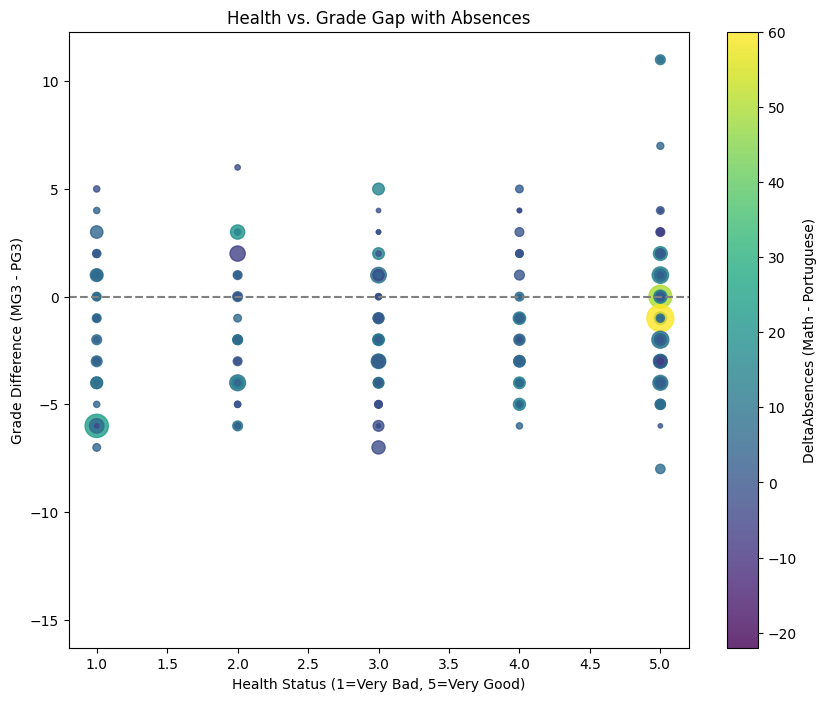

In [ ]:
import matplotlib.pyplot as plt

# Scatter: Health vs. Grade Difference (bubble size by absencesM, color by DeltaAbsences)
plt.figure(figsize=(10,8))
scatter = plt.scatter(sm_inter['health'], sm_inter['DeltaG3'],
                      s=sm_inter['absencesM'] * 5,
                      c=sm_inter['DeltaAbsences'],
                      cmap='viridis', alpha=0.8)

plt.colorbar(scatter, label='DeltaAbsences (Math - Portuguese)')
plt.xlabel('Health Status (1=Very Bad, 5=Very Good)')
plt.ylabel('Grade Difference (MG3 - PG3)')
plt.title('Health vs. Grade Gap with Absences')
plt.axhline(0, color='gray', linestyle='--')
plt.show()


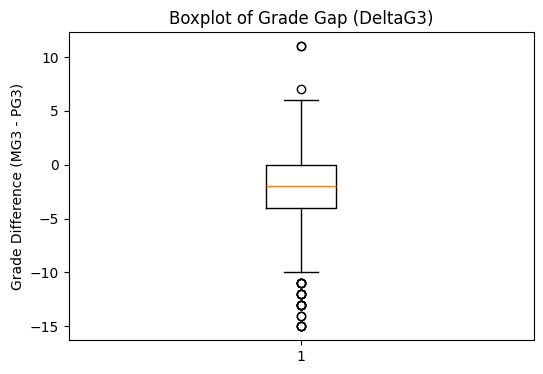

In [ ]:
# Boxplot for DeltaG3
plt.figure(figsize=(6,4))
plt.boxplot(sm_inter['DeltaG3'])
plt.title('Boxplot of Grade Gap (DeltaG3)')
plt.ylabel('Grade Difference (MG3 - PG3)')
plt.show()



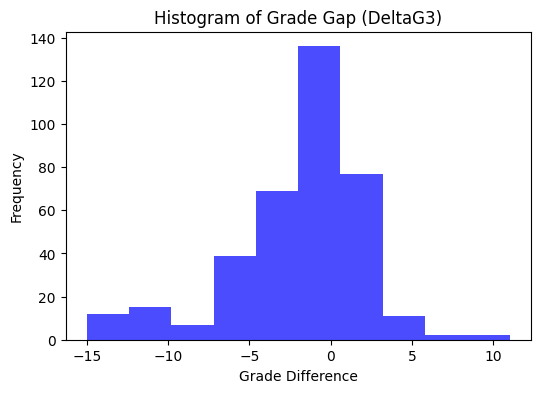

In [ ]:

# Histogram for DeltaG3
plt.figure(figsize=(6,4))
plt.hist(sm_inter['DeltaG3'], bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Grade Gap (DeltaG3)')
plt.xlabel('Grade Difference')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Filter students with |DeltaG3| > 4
extreme_gap = sm_inter[np.abs(sm_inter['DeltaG3']) > 4]

# Number of rows
print(f"Number of students with extreme grade differences: {extreme_gap.shape[0]}")

# Sample of extreme cases
print("\nSample extreme cases:")
print(extreme_gap[['MG3', 'PG3', 'DeltaG3', 'absencesM', 'absencesP', 'health']].head())


Number of students with extreme grade differences: 80

Sample extreme cases:
    MG3  PG3  DeltaG3  absencesM  absencesP  health
0     6   11       -5          6          4       3
1     6   11       -5          4          2       3
7     6   13       -7          6          2       1
10    9   14       -5          0          2       2
35    6   11       -5          0          4       5
